In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("./archive/netflix_titles.csv")
print(df1.info())
print(df1.head())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
 12  Unnamed: 12   1 non-null      object
dtypes: int64(2), object(11)
memory usage: 633.3+ KB
None
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes

In [3]:
df2=df1[df1["type"]=="Movie"]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,NaN
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,NaN
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,3,99 min,Comedies,When nerdy high schooler Dani finally attracts...,NaN
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",NaN
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,NaN
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,NaN
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,NaN
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...,NaN


In [4]:
print(df2["rating"].unique())
count=1
for item in df2["rating"].unique():
    df2["rating"].replace(to_replace=item,value=count,inplace=True)
    count+=1

[&#39;TV-PG&#39; &#39;TV-MA&#39; &#39;3&#39; &#39;R&#39; &#39;TV-Y7&#39; &#39;TV-Y&#39; &#39;NR&#39; &#39;PG-13&#39; &#39;TV-G&#39; &#39;PG&#39; &#39;G&#39;
 &#39;Unknown&#39; &#39;UR&#39; &#39;TV-Y7-FV&#39; &#39;NC-17&#39;]


In [5]:
movie_rec=df2.drop(["show_id","type","title","director","cast","country","date_added","duration","description","Unnamed: 12"],axis=1)
print(df2["rating"].unique())
movie_rec.info()
movie_rec["rating"].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 4265 entries, 0 to 6231
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  4265 non-null   int64 
 1   rating        4265 non-null   int64 
 2   listed_in     4265 non-null   object
dtypes: int64(2), object(1)
memory usage: 133.3+ KB


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
movie_rec["listed_in"]=le.fit_transform(movie_rec["listed_in"])
print(movie_rec.head())

   release_year  rating  listed_in
0          2019       1         68
1          2016       2        247
4          2017       3        114
6          2014       4        237
7          2017       2        247


In [7]:
print(movie_rec.corr())
print(movie_rec.describe())

              release_year    rating  listed_in
release_year      1.000000 -0.182361   0.205647
rating           -0.182361  1.000000  -0.261237
listed_in         0.205647 -0.261237   1.000000
       release_year       rating    listed_in
count   4265.000000  4265.000000  4265.000000
mean    2012.354279     3.774912   149.989449
std        9.735306     2.700754    66.938731
min     1942.000000     1.000000     0.000000
25%     2012.000000     2.000000   114.000000
50%     2016.000000     3.000000   163.000000
75%     2017.000000     4.000000   195.000000
max     2020.000000    15.000000   248.000000


In [8]:
# from sklearn.preprocessing import StandardScaler
# stsc = StandardScaler()
# movie_rec = pd.DataFrame(stsc.fit_transform(movie_rec),columns=["release_year","rating","listed_in"])
# movie_rec.head()

### Model Creation

Text(0, 0.5, &#39;Genre&#39;)

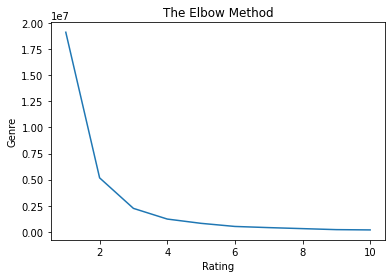

In [9]:
x = np.array(movie_rec.iloc[:,1:])
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1, 11): 
    kms = KMeans(n_clusters=i, random_state=42) 
    kms.fit(x) 
    wcss.append(kms.inertia_) 
plt.plot(range(1, 11), wcss) 
plt.title("The Elbow Method") 
plt.xlabel("Rating") 
plt.ylabel("Genre")

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=42)
ypred = km.fit_predict(x)
ypred

array([1, 3, 2, ..., 0, 0, 3], dtype=int32)

&lt;matplotlib.legend.Legend at 0x7f696dad5a60&gt;

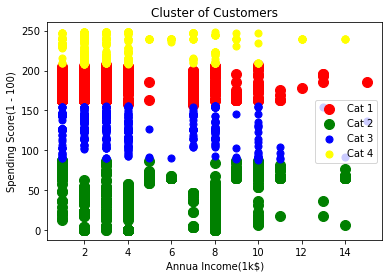

In [11]:
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], s=100, c="red", label="Cat 1") 
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], s=100, c="green", label="Cat 2") 
plt.scatter(x[ypred == 2, 0], x[ypred == 2, 1], s=50, c="blue", label="Cat 3") 
plt.scatter(x[ypred == 3, 0], x[ypred == 3, 1], s=50, c="yellow", label="Cat 4") 
plt.title("Cluster of Customers") 
plt.xlabel("Annua Income(1k$)") 
plt.ylabel("Spending Score(1 - 100)") 
plt.legend() 

In [12]:
def predict(name):
    lst=[]
    for item in df2["title"]:
        if name==str(item):
            value = df2[df2["title"]==name]
            break

    test_data=value.drop(["show_id","type","title","director","cast","country","date_added","duration","description","Unnamed: 12"],axis=1)
    test_data["listed_in"]=le.transform(test_data["listed_in"])
    print(test_data)        
    x = np.array(test_data.iloc[:,1:])            
    pred=kms.predict(x)        
    test_data["listed_in"]=le.inverse_transform(pred)
    print(test_data,test_data["listed_in"])
    result_genre=list(np.array(test_data.iloc[:,2]))
    print(type(result_genre),result_genre)
    return result_genre

In [13]:
rg=predict("Iverson")

      release_year  rating  listed_in
5579          2014       7        176
      release_year  rating                                          listed_in
5579          2014       7  Action &amp; Adventure, Children &amp; Family Movies, ... 5579    Action &amp; Adventure, Children &amp; Family Movies, ...
Name: listed_in, dtype: object
&lt;class &#39;list&#39;&gt; [&#39;Action &amp; Adventure, Children &amp; Family Movies, Classic Movies&#39;]


In [14]:
resultant_df=df1[df1["listed_in"]==rg[0]]
print(resultant_df["title"])

3614               Indiana Jones and the Last Crusade
3615    Indiana Jones and the Raiders of the Lost Ark
3616             Indiana Jones and the Temple of Doom
Name: title, dtype: object
